In [1]:
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline


/home/studio-lab-user/.conda/envs/reddit_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Loading Datasets
posts_df = pd.read_csv('Top_Posts.csv')
comments_df = pd.read_csv('Top_Posts_Comments.csv')

In [3]:
# Joning Comments with their respective Post ID
comments_posts_merged = posts_df.merge(comments_df, on = 'post_id', how = 'left')

# Deleting rows that doesn't contain any Comment
comments_posts_merged = comments_posts_merged[~comments_posts_merged['comment'].isnull()]

In [7]:
comments_posts_merged.sample(5)

,post_id,post_title,subreddit,post_url,flair_text,score,comments,upvote_ratio,date-time,year,comment
128725,aujtrm,"Bernie Sanders: ""I'm running for president bec...",artificial,https://twitter.com/BernieSanders/status/10997...,NaN,418,118,0.91,2019-02-25 10:31:50,2019,"Lol, moderate tone in text format. Good one."
106515,n1wnp6,Disillusioned with the field of data science,datascience,https://www.reddit.com/r/datascience/comments/...,Career,482,170,0.91,2021-04-30 15:46:41,2021,I wouldn't settle for this toxic culture perso...
123978,adkjpo,[D] MIT Deep Learning GitHub Repo,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,Discussion,429,10,0.98,2019-01-07 18:28:38,2019,thanx :) It will be great if we can share idea...
105992,jgknop,"""Hyperparameter Optimisation"" is the ultimate ...",datascience,https://www.reddit.com/r/datascience/comments/...,Discussion,480,64,0.98,2020-10-23 10:35:49,2020,Whenever I hear that I think of hyper-tuning m...
195597,d5dvju,Finance employer not keen on PhDs; changes job...,datascience,https://www.reddit.com/r/datascience/comments/...,Discussion,260,179,0.93,2019-09-17 08:08:03,2019,I have a bachelors... wanna trade?


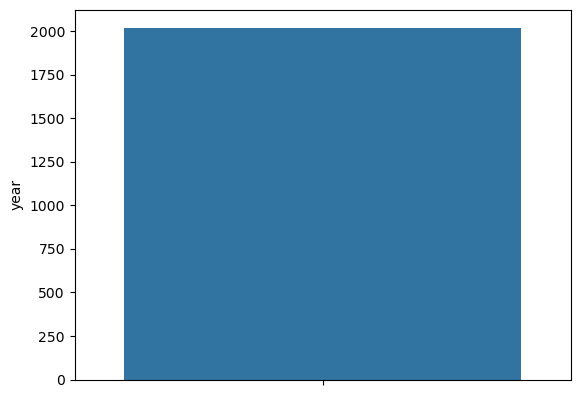

In [13]:
# Create a bar plot
sns.barplot(y="year", hue="subreddit", data=posts_df)
plt.show()

In [6]:
comments_posts_merged['subreddit'].value_counts()

datascience        107155
MachineLearning     95700
artificial          20304
Name: subreddit, dtype: int64

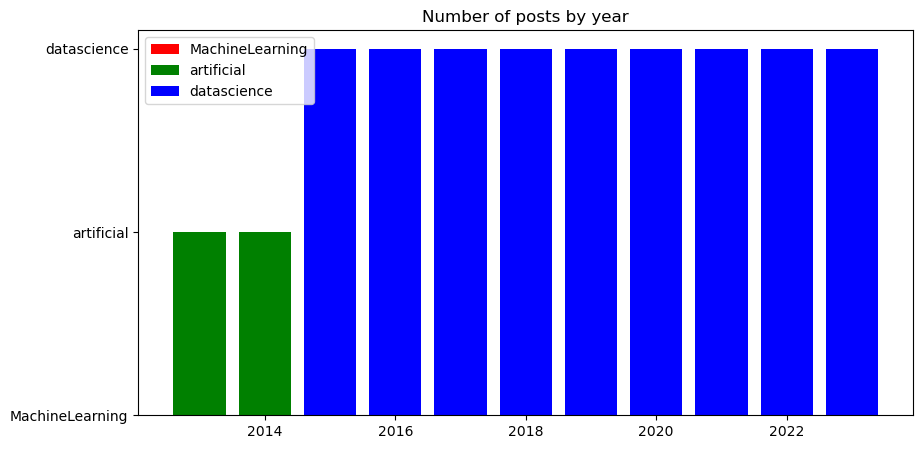

In [11]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 5))
colors = {'MachineLearning': 'red', 'datascience': 'blue', 'artificial': 'green'}
for i, (name, group) in enumerate(posts_df.groupby('subreddit')):
    ax.bar(group['year'], group['subreddit'], color=colors[name], label=name)

# Set title and legend
ax.set_title('Number of posts by year')
ax.legend()
plt.show()